In [1]:
# Importing modules to build, train, and test model
import os
import stat
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import matplotlib.ticker as mtick
import numpy as np
import imageio as im
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
import math
import PIL
from PIL import Image

# Importing modules to build heatmap
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.layers import Input
from keras import activations
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D
from keras import initializers
from keras.models import Model
import matplotlib.cm as cm
import random

from tensorflow.keras.applications import imagenet_utils
import h5py

from vis.visualization import overlay,visualize_cam,visualize_activation,visualize_saliency
from vis.utils import utils

import imageio
import time
import ntpath
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

print("All loaded!")

Using TensorFlow backend.


All loaded!


In [2]:
# Clearing the memory for a fresh start and prevention of slowdown
tf.keras.backend.clear_session()

In [27]:
# Defining directories to make easier to reference later on:

cwd = os.getcwd()
training_dir = "D:\\DS_Datasets\\Updated_DS_AVI\\DS1\\DS1J_full_split\\train\\"
testing_dir = "D:\\DS_Datasets\\Updated_DS_AVI\\DS1\\DS1J_full\\"
validation_dir = "D:\\DS_Datasets\\Updated_DS_AVI\\DS1\\DS1J_full_split\\val\\"
output_dir = cwd + "\output"
weights_dir = '\outputs\\boiling_weights.hdf5'
classifier_dir = cwd + "\outputs\\boiling_model.h5"
#output_dir = "/images"

In [28]:
# Creating (and downscaling) the location for the image data to be stored
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

# Setting the image/batch parameters to change easily if need be
# Certain parameters later on typically depend on these values
image_width = 128
image_height = 128
batch_size = 25

# Taking in the image data from a given directory
# The classes are automatically set based on how the folders are arranged
#training_set = train_datagen.flow_from_directory(training_dir,
#                                                 target_size = (image_width, image_height),
#                                                 batch_size = batch_size,
#                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(testing_dir,
                                            target_size = (image_width, image_height),
                                            batch_size = 1,
                                            shuffle=False,
                                            class_mode = 'categorical')

#validation_set = val_datagen.flow_from_directory(validation_dir,
#                                                 target_size = (image_width, image_height),
#                                                 batch_size = batch_size,
#                                                 shuffle=True,
#                                                 class_mode = 'categorical')

Found 117477 images belonging to 22 classes.


In [29]:
model_dir = "D:\\DS_Datasets\\Updated_DS_AVI\\DS1\\cnn_ds1j_full_cut_model.h5"

In [30]:
model = load_model(model_dir)

In [31]:
filenames = test_set.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_set, steps = nb_samples, verbose=1)

117477/117477 [==============================] - 2481s 21ms/step


In [32]:
y_pred_report = np.argmax(predict, axis = 1)

In [33]:
print('Classification Report')
target_names = ["class_00", "class_01", "class_02", "class_03",
               "class_04", "class_05", "class_06", "class_07",
               "class_08", "class_09", "class_10", "class_11",
               "class_12", "class_13", "class_14", "class_15",
               "class_16", "class_17", "class_18", "class_19",
               "class_20", "class_21"]
print(classification_report(test_set.classes, y_pred_report, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    class_00       1.00      1.00      1.00      5001
    class_01       1.00      1.00      1.00      5001
    class_02       1.00      1.00      1.00      5001
    class_03       1.00      1.00      1.00      5001
    class_04       1.00      1.00      1.00      5001
    class_05       1.00      1.00      1.00      5001
    class_06       1.00      1.00      1.00      5001
    class_07       0.99      1.00      0.99      5001
    class_08       1.00      0.96      0.98      5001
    class_09       0.96      1.00      0.98      5001
    class_10       0.98      1.00      0.99      5001
    class_11       0.99      0.99      0.99      5001
    class_12       0.99      0.96      0.98      5001
    class_13       0.97      0.99      0.98      5001
    class_14       0.96      0.98      0.97      5001
    class_15       0.97      0.95      0.96      5001
    class_16       0.27      1.00      0.43      5001
    c

C:\Users\cheo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print('Confusion Matrix')
matrix=confusion_matrix(test_set.classes, y_pred_report)
print(matrix)

Confusion Matrix
[[5001    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0 5001    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0 5001    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 5001    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0 5001    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    5 4994    0    1    0    1    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 4996    1    0    3    1    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 4991    0   10    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    2   49 4825  119    6    0  

In [26]:
print(matrix[1])

[   0 1000    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


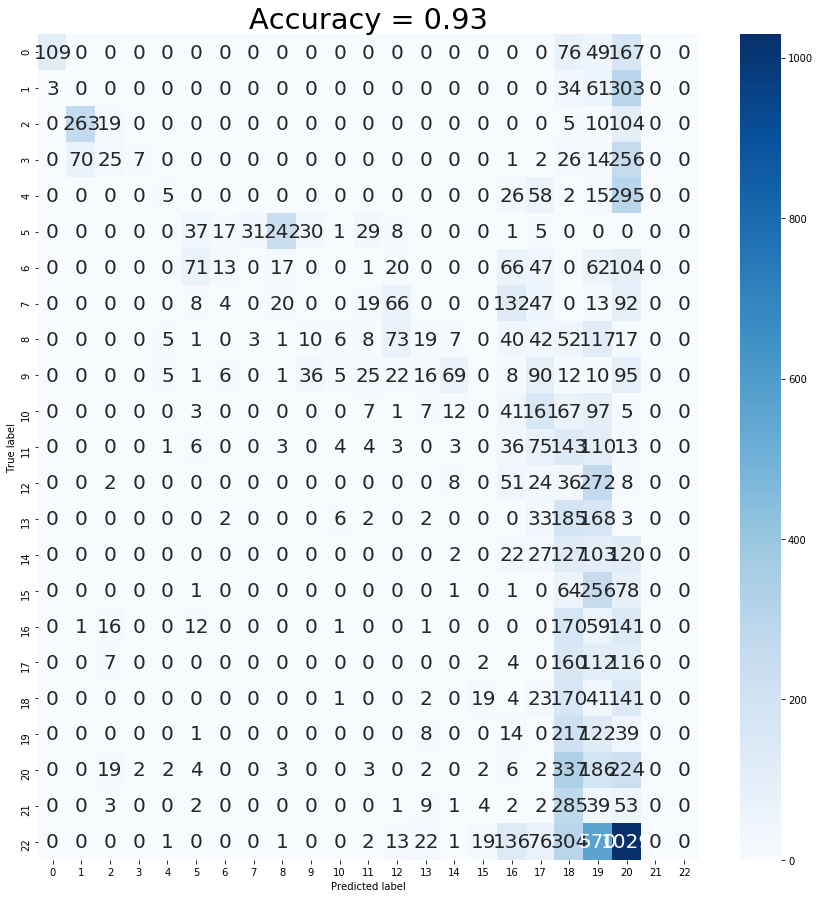

In [26]:
figure = matplotlib.pyplot.figure(figsize=(12, 12))
sns.heatmap(matrix, annot=True,cmap=matplotlib.pyplot.cm.Blues,
           annot_kws={"size": 20}, fmt='d')
matplotlib.pyplot.tight_layout()
matplotlib.rcParams.update({'font.size': 24})
matplotlib.pyplot.title("Accuracy = 0.93")
matplotlib.pyplot.ylabel('True label')
matplotlib.pyplot.xlabel('Predicted label')

#matplotlib.pyplot.savefig('conmatrix_cnn_1.1.0.png',bbox_inches='tight')
matplotlib.pyplot.show()